# EMOBOT

## Import Modules

In [37]:
import numpy as np
import pandas as pd
import os
import keras
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

## Load Dataset(s)

In [38]:
paths = []
labels = []
for dirname, _, filenames in os.walk('Tess'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())

print("Dataset is loaded")

Dataset is loaded


In [40]:
paths[:5]

[]

In [41]:
labels[:5]

[]

In [42]:
# Creating a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label


In [43]:
df['label'].value_counts()

Series([], Name: count, dtype: int64)

## Explortory Data Analysis

<Axes: >

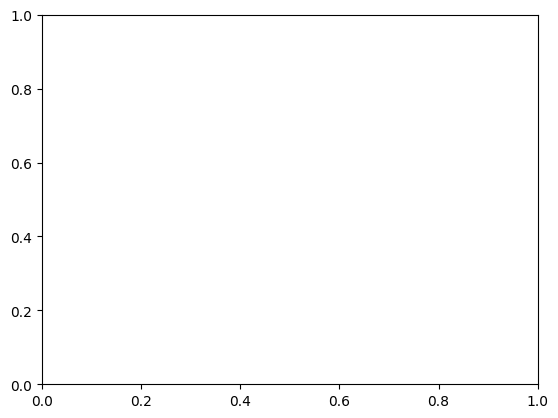

In [44]:
sns.countplot(df['label'])

In [45]:
def waveplot (data, sr, emotions):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotions):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar 


In [46]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

IndexError: index 0 is out of bounds for axis 0 with size 0

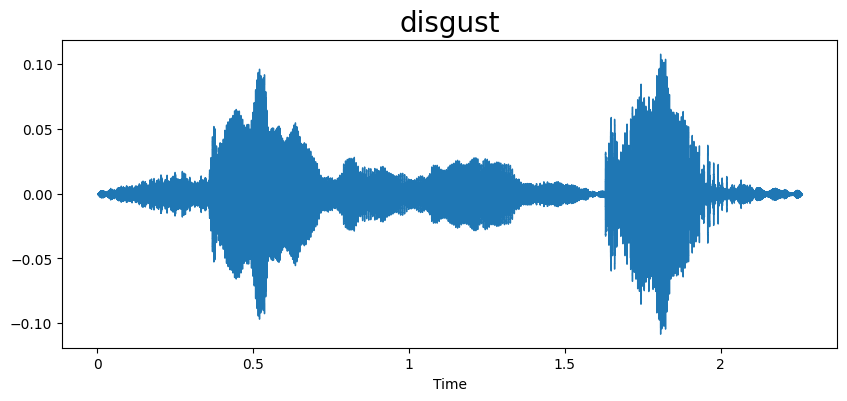

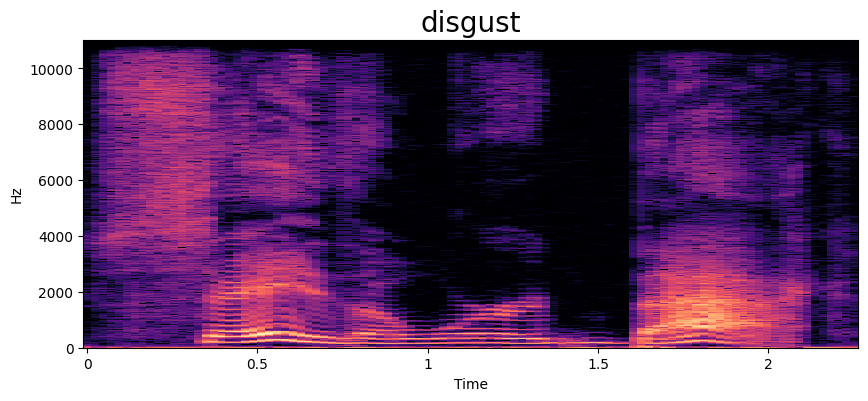

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

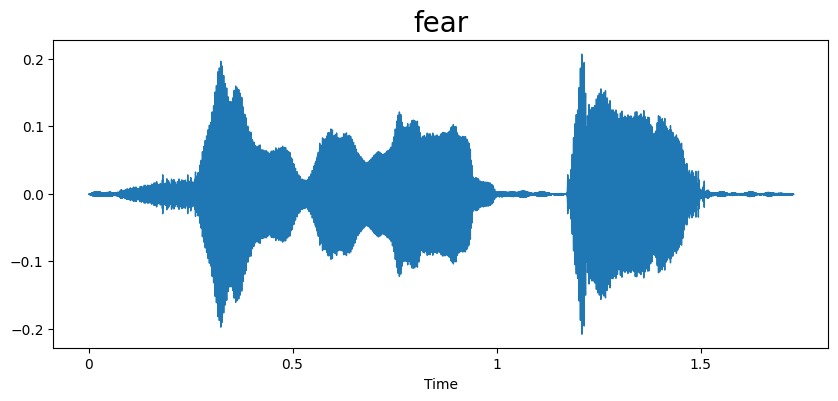

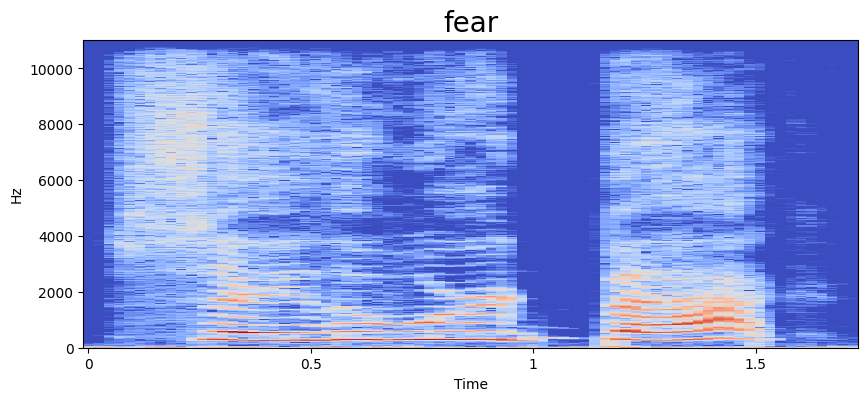

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

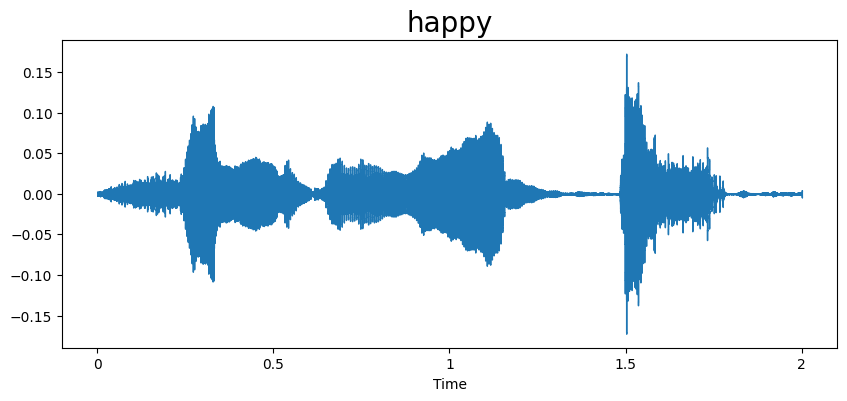

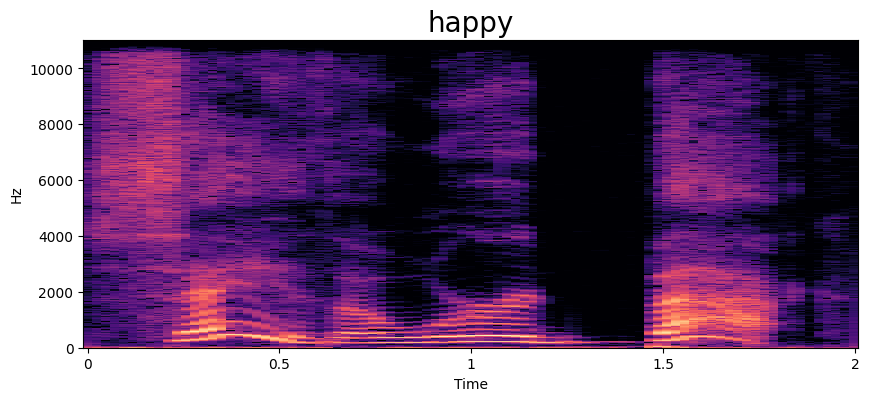

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

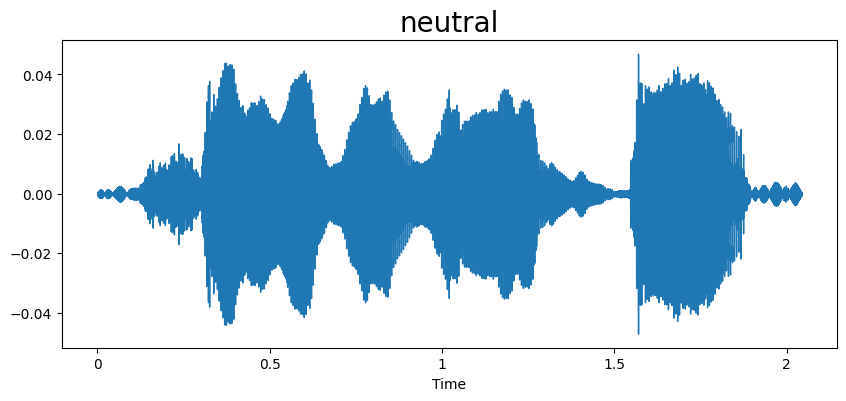

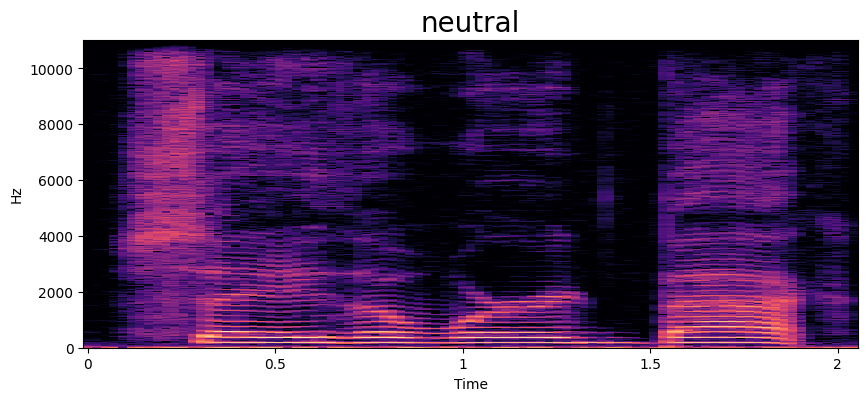

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

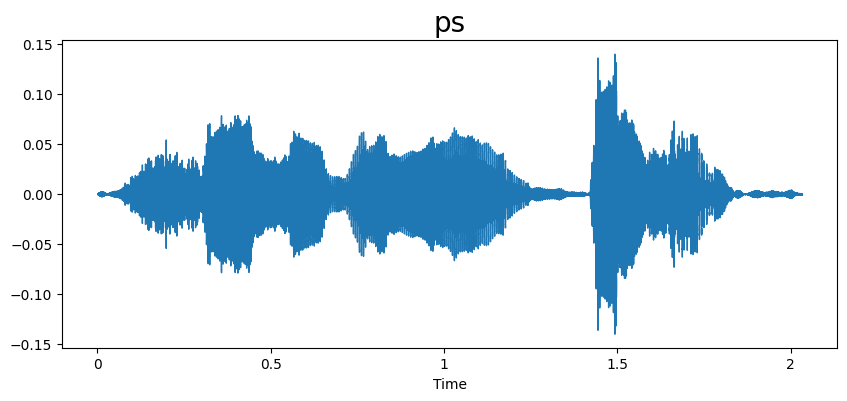

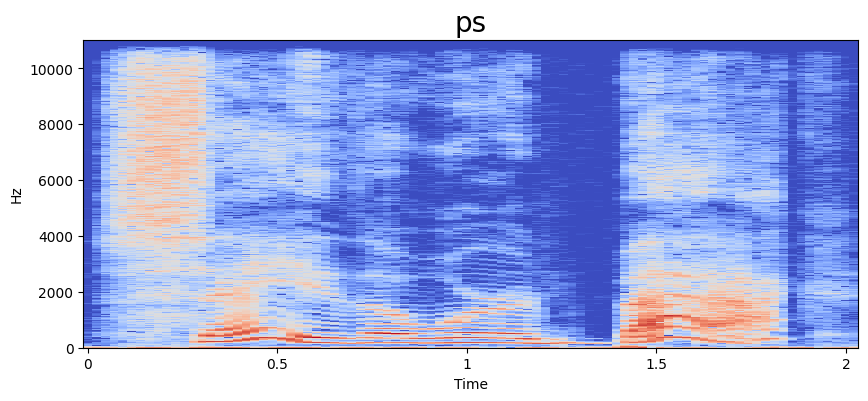

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

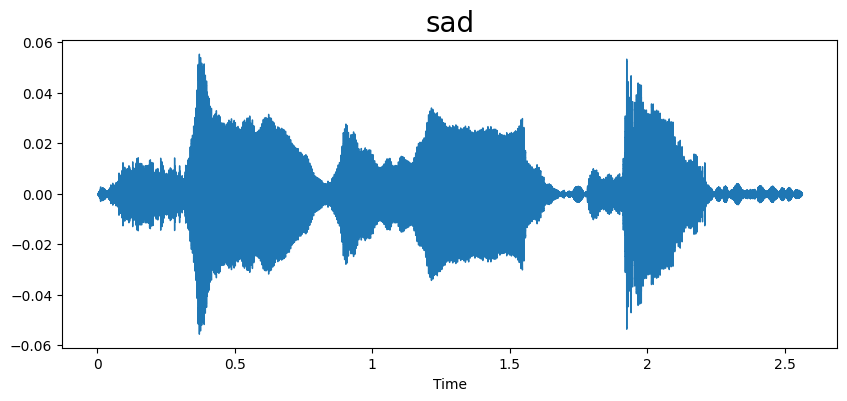

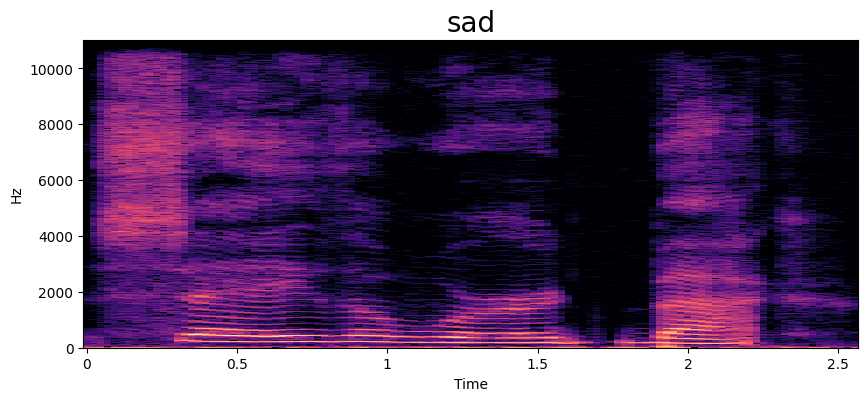

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [ ]:
def extract_features(filename):
    y, sr = librosa.load(filename, duration = 3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_features(df['speech'][0])

array([-3.9698621e+02,  7.7440536e+01, -1.9592791e+01, -2.1666689e+01,
       -2.1127560e+00,  1.0075363e+01, -2.0366707e+01, -6.0924492e+00,
       -7.2122831e+00, -5.5736625e-01, -1.8325533e+00,  2.0210145e-01,
        7.2755075e-01,  1.3177377e+00,  2.8863375e+00,  2.8557906e+00,
       -4.7129216e+00, -4.4365110e+00, -1.6211592e+00, -1.0239839e+01,
       -7.5512629e+00, -1.7968802e+00, -7.0376525e+00,  9.4365845e+00,
        8.3558550e+00,  2.1712360e+01,  1.9216991e+01,  2.0348930e+01,
        1.3413366e+01,  8.3391724e+00,  3.9472228e-01,  5.1113148e+00,
        9.5687389e+00,  5.4548683e+00,  2.5099638e+00, -1.8239073e+00,
        4.8689618e+00,  9.3139238e+00,  2.0891502e+00, -1.9064914e+00],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_features(x))
X_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.6560086, -32.74544, -...
2       [-429.79196, 46.12401, 1.5550478, -0.21709442,...
3       [-403.46118, 76.32369, -12.531775, -22.288858,...
4       [-434.05756, 77.4455, 10.865501, 16.092945, 8....
                              ...                        
2795    [-406.48053, 80.379875, 32.462395, 46.579094, ...
2796    [-426.90918, 102.54756, 24.800041, 43.048096, ...
2797    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
2798    [-434.8618, 89.906364, 28.373262, 39.577065, -...
2799    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: speech, Length: 2800, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
# Input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y = encoder.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape
# print('Number of samples = 2800  ,   Number of Categories = 7 ')

(2800, 7)

In [ ]:
%pip install keras

Note: you may need to restart the kernel to use updated packages.


## Create LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(40, 1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax'),
])


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 123)               61500     
                                                                 
 dense (Dense)               (None, 64)                7936      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71747 (280.26 KB)
Trainable params: 71747 

In [ ]:
# Train The Model
history = model.fit(X, y, validation_split=0.2, epochs=100, batch_size=10, shuffle=True)

Epoch 1/100
224/224 [==============================] - 10s 39ms/step - loss: 3.7413e-04 - accuracy: 1.0000 - val_loss: 5.8717 - val_accuracy: 0.4857
Epoch 2/100
224/224 [==============================] - 11s 48ms/step - loss: 0.1357 - accuracy: 0.9714 - val_loss: 1.8350 - val_accuracy: 0.5179
Epoch 3/100
224/224 [==============================] - 6s 27ms/step - loss: 0.1734 - accuracy: 0.9482 - val_loss: 3.5911 - val_accuracy: 0.3393
Epoch 4/100
224/224 [==============================] - 6s 26ms/step - loss: 0.0649 - accuracy: 0.9808 - val_loss: 3.4727 - val_accuracy: 0.3964
Epoch 5/100
224/224 [==============================] - 7s 32ms/step - loss: 0.0702 - accuracy: 0.9799 - val_loss: 3.8233 - val_accuracy: 0.4732
Epoch 6/100
224/224 [==============================] - 7s 30ms/step - loss: 0.0355 - accuracy: 0.9902 - val_loss: 4.4008 - val_accuracy: 0.3786
Epoch 7/100
224/224 [==============================] - 6s 25ms/step - loss: 0.0520 - accuracy: 0.9844 - val_loss: 3.4130 - val_acc

## Plot The Result

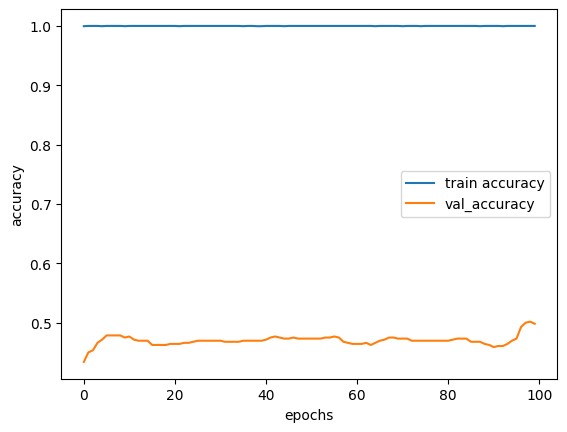

In [ ]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

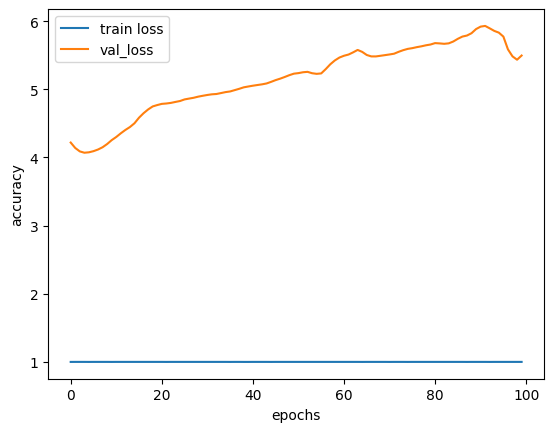

In [ ]:
loss = history.history['loss']
val_acc = history.history['val_loss']

plt.plot(epochs, acc, label='train loss')
plt.plot(epochs, val_acc, label='val_loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()